In [2]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt

We add the parameters for a double pendulum movement

In [3]:
# Pendulum rod lengths (m), bob masses (kg).
L1, L2 = 1, 2
m1, m2 = 1, 1
# The gravitational acceleration (m.s-2).
g = 9.81

def deriv(y, t, L1, L2, m1, m2):
    """Return the first derivatives of y = theta1, z1, theta2, z2."""
    a1, z1, a2, z2 = y

    c, s = np.cos(a1-a2), np.sin(a1-a2)

    a1dt = z1
    z1dt = (m2*g*np.sin(a2)*c - m2*s*(L1*z1**2*c + L2*z2**2) - (m1+m2)*g*np.sin(a1)) / L1 / (m1 + m2*s**2)
    a2dt = z2
    z2dt = ((m1+m2)*(L1*z1**2*s - g*np.sin(a2) + g*np.sin(a1)*c) + m2*L2*z2**2*s*c) / L2 / (m1 + m2*s**2)
    return a1dt, z1dt, a2dt, z2dt

In [39]:
tmax, dt = 10, 0.01
t = np.arange(0, tmax+dt, dt)

y0 = np.array([2, -1, 0, 0]) # Initial conditions: theta1, dtheta1/dt, theta2, dtheta2/dt.
y = odeint(deriv, y0, t, args=(L1, L2, m1, m2)) # Do the numerical integration of the equations of motion

In [40]:
theta1, theta2 = y[:,0], y[:,2]
vel1, vel2 = y[:,1], y[:,3]
# Convert to Cartesian coordinates of the two bob positions.
x1 = L1 * np.sin(theta1)
y1 = -L1 * np.cos(theta1)
x2 = x1 + L2 * np.sin(theta2)
y2 = y1 - L2 * np.cos(theta2)

#vx1 = L1 * np.sin(vel1)
#vy1 = -L1 * np.cos(vel1)
#vx2 = x1 + L2 * np.sin(vel2)
#vy2 = y1 - L2 * np.cos(vel2)

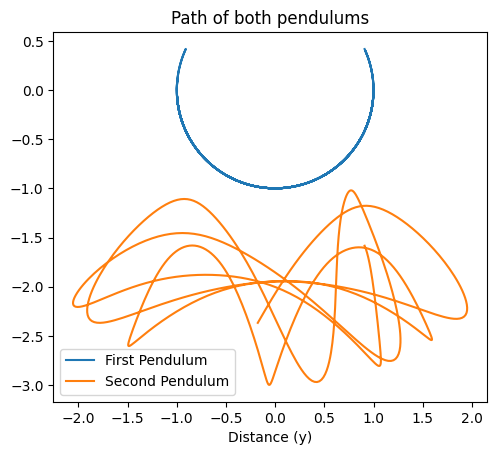

In [41]:
fig = plt.subplot(111)
ax = plt.gca()
ax.plot(x1, y1, label = 'First Pendulum')
ax.plot(x2, y2, label = 'Second Pendulum')


plt.title('Path of both pendulums')
ax.set_xlabel("Distance (x)")
ax.set_xlabel("Distance (y)")
ax.set_aspect('equal', adjustable='box')
legend = ax.legend()
plt.show()

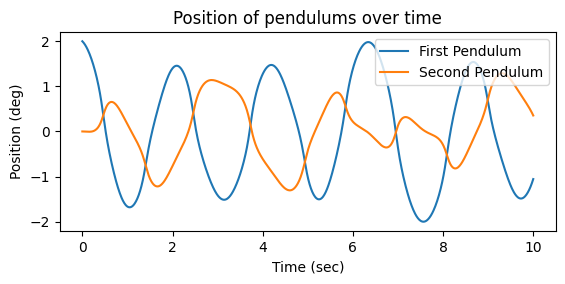

In [42]:
fig = plt.subplot(111)

plt.title('Position of pendulums over time')
ax = plt.gca()
ax.set_xlabel("Time (sec)")
ax.set_ylabel("Position (deg)")
ax.set_aspect('equal', adjustable='box')
ax.plot(t, theta1, label = 'First Pendulum')
ax.plot(t, theta2, label = 'Second Pendulum')
legend = ax.legend()
plt.show()